In [1]:
import topiary

In [2]:
topiary.find_best_model(df="initial-input/dataframe.csv",
                        calc_dir="00_find-best-model",
                        seed=12345,
                        model_matrices=["LG","JTT"],
                        model_rates=None,
                        model_freqs=None,
                        model_invariant=None,
                        overwrite=True)


----------------------------------------------------------------------

topiary is starting a find_best_model calculation in ./00_find-best-model:


Generating maximum parsimony tree.

Launching raxml-ng, 0:00:00.001809 (H:M:S)
Constructing set of possible models.
Testing 2 models.
, 0:00:00.011788 (H:M:S)


  0%|          | 0/2 [00:00<?, ?it/s]


Top 10 models:

               model           AICc prob
                  LG               0.939
                 JTT               0.061


topiary ran a find_best_model calculation in ./00_find-best-model:

+ Completed in 0:00:01.529883 (H:M:S)
+ Wrote results to ./00_find-best-model/output

----------------------------------------------------------------------





----------------------------------------------------------------------

topiary is starting a ml_tree calculation in ./01_gene-tree:

Launching raxml-ng, 0:00:00.001941 (H:M:S)
Running 'raxml-ng --search --msa alignment.phy --model LG --seed 12345 --threads auto{10}'


topiary ran a ml_tree calculation in ./01_gene-tree:

+ Completed in 0:00:02.029386 (H:M:S)
+ Wrote results to ./01_gene-tree/output

----------------------------------------------------------------------




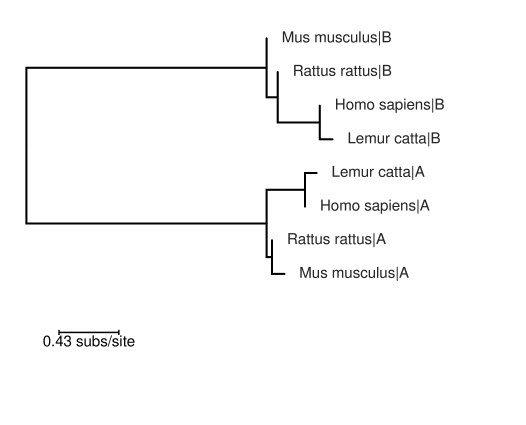

In [3]:
topiary.generate_ml_tree(previous_dir="00_find-best-model",
                         calc_dir="01_gene-tree",
                         overwrite=True)


----------------------------------------------------------------------

topiary is starting a reconcile calculation in ./02_reconcile:

Setting up reconcilation directory, 0:00:00.002150 (H:M:S)
launching generax, 0:00:00.016061 (H:M:S)
Running 'generax --families control.txt --species-tree species_tree.newick --prefix result --rec-model UndatedDTL'


topiary ran a reconcile calculation in ./02_reconcile:

+ Completed in 0:00:02.038742 (H:M:S)
+ Wrote results to ./02_reconcile/output

----------------------------------------------------------------------




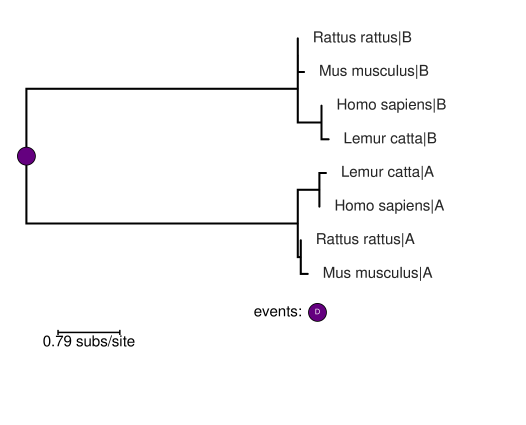

In [4]:
topiary.reconcile(previous_dir="01_gene-tree/",
                  calc_dir="02_reconcile",
                  species_tree="initial-input/species-tree.newick",
                  num_threads=1,
                  overwrite=True)


----------------------------------------------------------------------

topiary is starting a ancestors calculation in ./03_ancestors:

Reconstructing ancestral states.

Launching raxml-ng, 0:00:00.004585 (H:M:S)
parsing ancestral output, 0:00:00.050270 (H:M:S)


topiary ran a reconcile_ancestors calculation in ./03_ancestors:

+ Completed in 0:00:00.674542 (H:M:S)
+ Wrote results to ./03_ancestors/output

----------------------------------------------------------------------




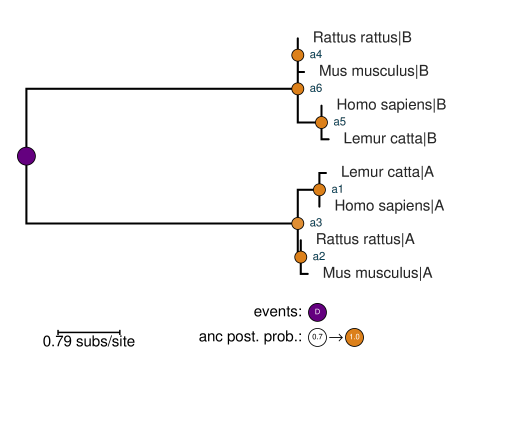

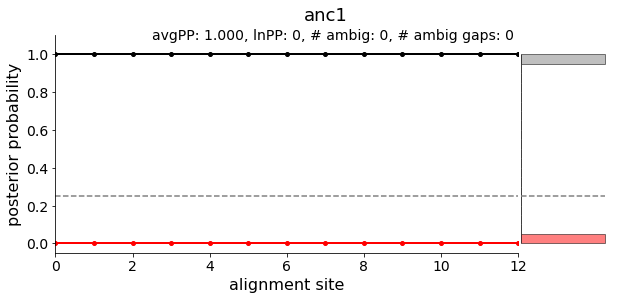

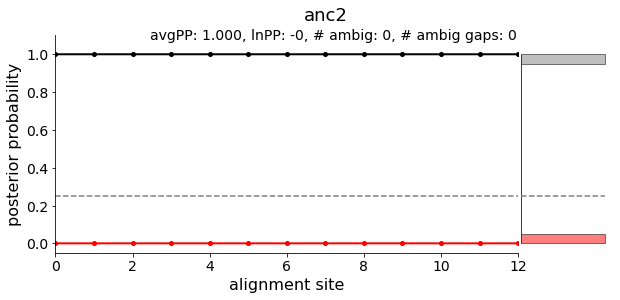

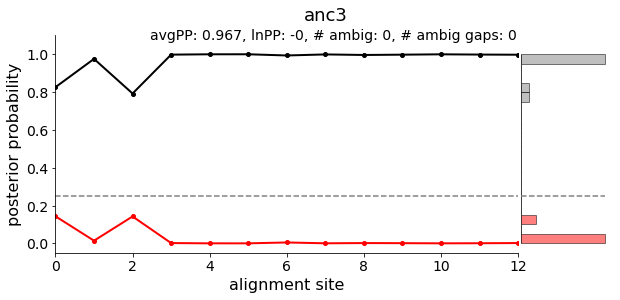

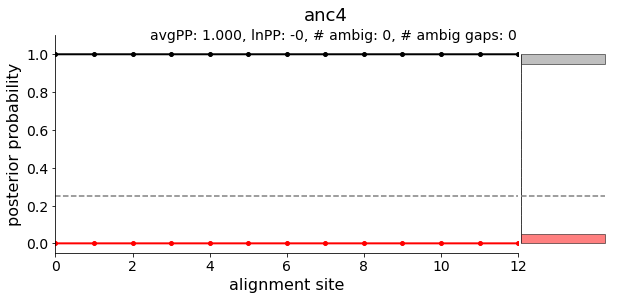

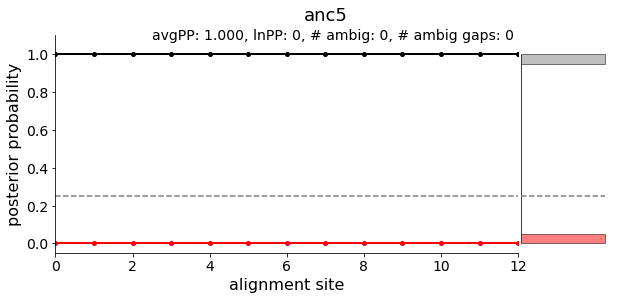

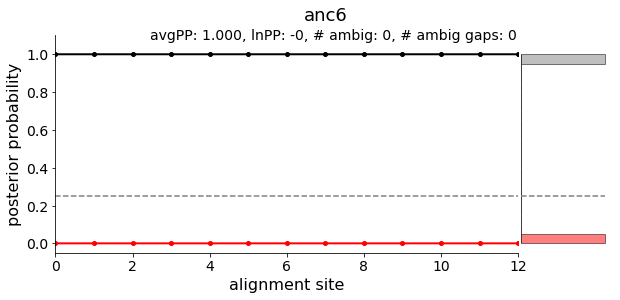

In [5]:
topiary.generate_ancestors(previous_dir="02_reconcile/",
                           calc_dir="03_ancestors",
                           overwrite=True)


----------------------------------------------------------------------

topiary is starting a ml_bootstrap calculation in ./04_bootstraps:

Launching raxml-ng, 0:00:00.003673 (H:M:S)
Running 'raxml-ng --bootstrap --msa alignment.phy --tree tree.newick --model LG --seed 12345 --threads 10 --bs-trees autoMRE --bs-write-msa'

RAxML-NG v. 1.1.0 released on 29.11.2021 by The Exelixis Lab.
Developed by: Alexey M. Kozlov and Alexandros Stamatakis.
Contributors: Diego Darriba, Tomas Flouri, Benoit Morel, Sarah Lutteropp, Ben Bettisworth.
Latest version: https://github.com/amkozlov/raxml-ng
Questions/problems/suggestions? Please visit: https://groups.google.com/forum/#!forum/raxml

System: Apple M1 Pro, 10 cores, 16 GB RAM

RAxML-NG was called at 15-Aug-2022 13:54:09 as follows:

raxml-ng --bootstrap --msa alignment.phy --tree tree.newick --model LG --seed 12345 --threads 10 --bs-trees autoMRE --bs-write-msa

Analysis options:
  run mode: Bootstrapping
  start tree(s): user
  bootstrap replica

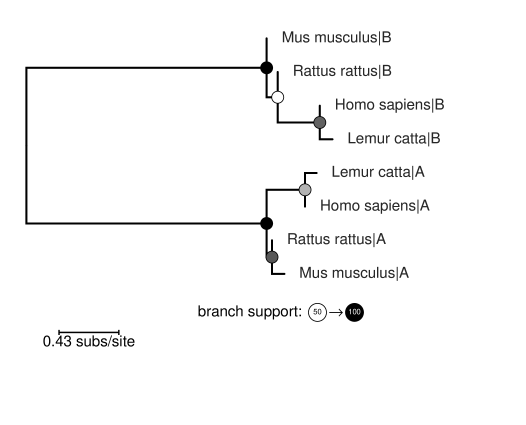

In [6]:
topiary.generate_bootstraps(previous_dir="03_ancestors/",
                            calc_dir="04_bootstraps",
                            overwrite=True)


----------------------------------------------------------------------

topiary is starting a reconcile_bootstrap calculation in ./05_reconcile-bootstraps:

Setting up bootstrap replicates directories., 0:00:00.003216 (H:M:S)


  0%|          | 0/350 [00:00<?, ?it/s]

Running bootstrap calculations., 0:00:05.805208 (H:M:S)

Generating reconciliation bootstraps.

Combining bootstrap calculations., 0:00:21.538879 (H:M:S)

Compressing replicates.



topiary ran a reconcile_bootstrap calculation in ./05_reconcile-bootstraps:

+ Completed in 0:00:27.025047 (H:M:S)
+ Wrote results to ./05_reconcile-bootstraps/output

----------------------------------------------------------------------




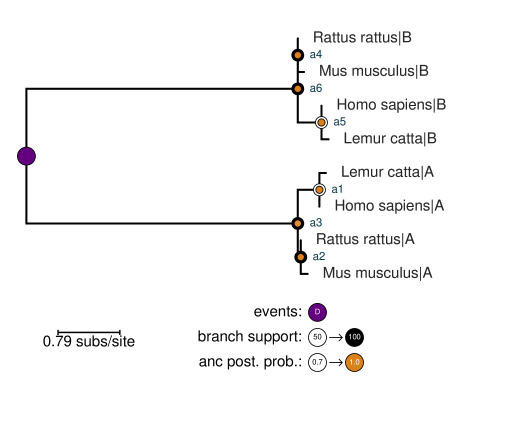

In [7]:
topiary.reconcile(previous_dir="04_bootstraps/",
                  calc_dir="05_reconcile-bootstraps",
                  bootstrap=True,
                  overwrite=True)